# Mini-Projeto Decision Tree Classifier: Classifica√ß√£o de Sobreviventes do Titanic

## Grupo
* Amanda Cristina (acfml)
* Jo√£o Marcos (jmav)
* Mateus Galdino (mglg)
* Matheus Augusto (mams4)
* Rodrigo Rossiter Ladvocat Cintra (rrlc)

## Vis√£o Geral do Projeto
Este notebook documenta o desenvolvimento de um modelo de Machine Learning para prever a sobreviv√™ncia de passageiros do navio Titanic. O desafio consiste em utilizar Redes Neurais Artificiais, especificamente o modelo Decision Tree Classifier, para classificar os passageiros com base em seus atributos, como classe, idade e sexo.

### Objetivos Espec√≠ficos
- **An√°lise Explorat√≥ria:** Investigar o dataset para extrair insights e compreender as rela√ß√µes entre as vari√°veis.
- **Engenharia de Atributos:** Realizar o tratamento de dados faltantes, a codifica√ß√£o de vari√°veis categ√≥ricas (como 'sexo' e 'porto de embarque') e a normaliza√ß√£o de vari√°veis num√©ricas.
- **Modelagem com DT e RF:** Construir, treinar e validar classificadores, experimentando diferentes arquiteturas e hiperpar√¢metros.
- **Avalia√ß√£o de Desempenho:** Avaliar a performance final do modelo utilizando m√©tricas como acur√°cia, precis√£o, recall e matriz de confus√£o.

### Metodologia Aplicada
A abordagem ser√° dividida nas seguintes fases:
1.  **Carregamento e An√°lise dos Dados:** Importa√ß√£o das bibliotecas e do dataset, seguida por uma explora√ß√£o inicial.
2.  **Pr√©-processamento:** Limpeza e transforma√ß√£o dos dados para garantir que estejam prontos para o treinamento.
3.  **Defini√ß√£o e Treinamento do Modelo:** Configura√ß√£o da arquitetura Decision Tree e execu√ß√£o do processo de treinamento.
4.  **Avalia√ß√£o e Conclus√£o:** An√°lise dos resultados obtidos no conjunto de teste e apresenta√ß√£o das conclus√µes do projeto.

## Importando bibliotecas

Explicar as bibs que estamos usando e o que elas fazem!!!

In [ ]:
pip install optuna

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 395.9/395.9 kB 13.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 247.0/247.0 kB 13.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import optuna
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.impute import SimpleImputer
from sklearn.exceptions import ConvergenceWarning




## **Parte 1 - An√°lise dos Dados**

O dataset utilizado √© o da base de dados do kaggle **"Titanic - Machine Learning from Disaster"**, que √© um conjunto de dados cl√°ssico, amplamente utilizado para o ensino e pr√°tica de t√©cnicas de **aprendizado de m√°quina**.

Ele cont√©m informa√ß√µes detalhadas sobre os passageiros a bordo do **RMS Titanic**, que naufragou em sua viagem inaugural em 1912.

Entre as vari√°veis dispon√≠veis est√£o:

- **PassengerId** ‚Äì Identificador √∫nico de cada passageiro  
- **Survived** ‚Äì Vari√°vel alvo: indica se o passageiro sobreviveu ("1") ou n√£o ("0")  
- **Pclass** ‚Äì Classe do bilhete (1¬™, 2¬™ ou 3¬™ classe)  
- **Name** ‚Äì Nome completo do passageiro  
- **Sex** ‚Äì G√™nero do passageiro ("male" ou "female")  
- **Age** ‚Äì Idade do passageiro em anos  
- **SibSp** ‚Äì N√∫mero de irm√£os/c√¥njuges a bordo  
- **Parch** ‚Äì N√∫mero de pais/filhos a bordo  
- **Ticket** ‚Äì N√∫mero do bilhete  
- **Fare** ‚Äì Tarifa paga pelo bilhete  
- **Cabin** ‚Äì N√∫mero da cabine (muitos valores ausentes)  
- **Embarked** ‚Äì Porto de embarque ("C" = Cherbourg, "Q" = Queenstown, "S" = Southampton)

A **vari√°vel alvo** √© "Survived", que indica se um passageiro **sobreviveu** ("1") ou **n√£o sobreviveu** ("0") ao desastre.

https://www.kaggle.com/c/titanic/data

### Importando Dados

In [ ]:
url_train = 'https://raw.githubusercontent.com/NotAyushXD/Titanic-dataset/master/train.csv'
url_test = 'https://raw.githubusercontent.com/NotAyushXD/Titanic-dataset/master/test.csv'

# Leitura dos datasets
train_set = pd.read_csv(url_train)
test_set = pd.read_csv(url_test)

### Conjunto dos dados de treino e teste

In [ ]:
print("Train Set:")
display(train_set)

print("Test Set:")
display(test_set)

Train Set:


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

Test Set:


PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

In [ ]:
train_set.shape

(891, 12)

In [ ]:
train_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Vari√°veis num√©ricas
numeric_features = train_set.select_dtypes(include=np.number)
numeric_features.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
# Vari√°veis categ√≥ricas
catagoric_features = train_set.select_dtypes(exclude=np.number)
catagoric_features.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

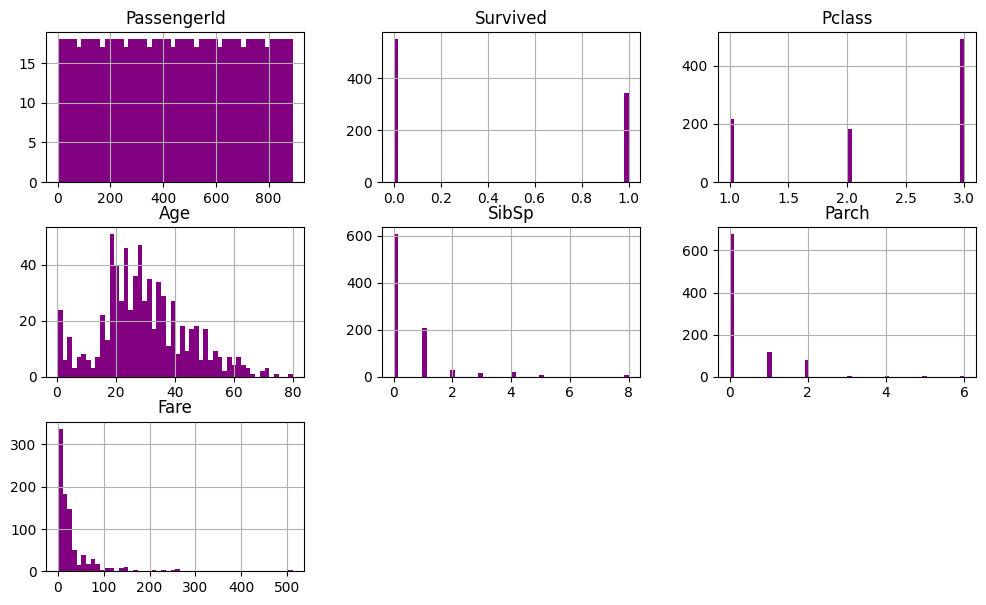

In [ ]:
train_set.hist(bins=50, figsize=(12, 7), color='purple')
plt.show()

### Correla√ß√£o entre Vari√°veis

A an√°lise de correla√ß√£o √© uma etapa essencial na explora√ß√£o de dados, pois permite identificar o grau de relacionamento entre diferentes vari√°veis do conjunto. Esse tipo de an√°lise ajuda a entender como as vari√°veis est√£o conectadas entre si e pode revelar padr√µes importantes.

Correla√ß√µes mais fortes podem indicar poss√≠veis influ√™ncias ou depend√™ncias entre vari√°veis, sendo √∫teis para decis√µes em modelagem preditiva, sele√ß√£o de atributos e interpreta√ß√£o dos dados. No contexto do Titanic, por exemplo, pode-se investigar se caracter√≠sticas como idade, classe social ou g√™nero t√™m rela√ß√£o com a taxa de sobreviv√™ncia.

In [ ]:
# Correla√ß√£o das vari√°veis num√©ricas em rela√ß√£o ao atributo 'Survived'
correlation = numeric_features.corr()
print(correlation['Survived'].sort_values(ascending=False), '\n')

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64 



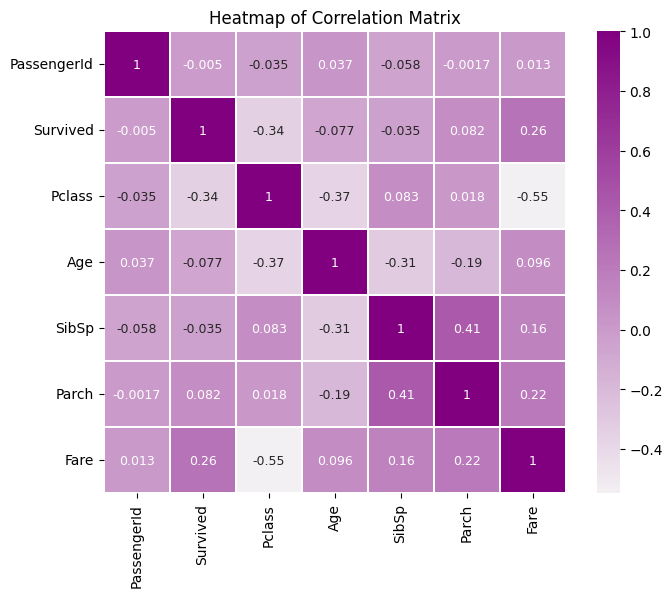

In [ ]:
# Mapa de calor da matriz de correla√ß√£o entre todas as vari√°veis
cmap = sns.light_palette('purple', as_cmap=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, square=True, cmap=cmap, annot=True, annot_kws={'size': 9}, linecolor='white', linewidths=0.01)
plt.title('Heatmap of Correlation Matrix')
plt.show()

A seguir, analisaremos a frequ√™ncia de sobreviv√™ncia dos passageiros em rela√ß√£o √† colunas relacionadas.

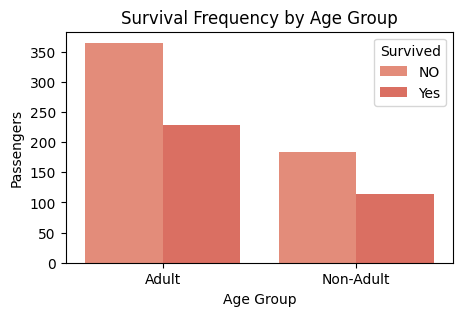

In [ ]:
# Criando um DataFrame para categorizar passageiros adultos e n√£o adultos
train_set['AgeGroup'] = train_set['Age'].apply(lambda x: 'Adult' if x >= 18 and x<= 65 else 'Non-Adult')

# Configurando a paleta de cores
sns.set_palette('Reds_d')

# Plotando a frequ√™ncia de sobreviv√™ncia por classes de idade
plt.figure(figsize=(5, 3))
sns.countplot(x='AgeGroup', hue='Survived', data=train_set)
plt.title('Survival Frequency by Age Group')

plt.xlabel('Age Group')
plt.ylabel('Passengers')
plt.legend(title='Survived', labels=['NO', 'Yes'])

plt.show()
train_set = train_set.drop(['AgeGroup'], axis=1)

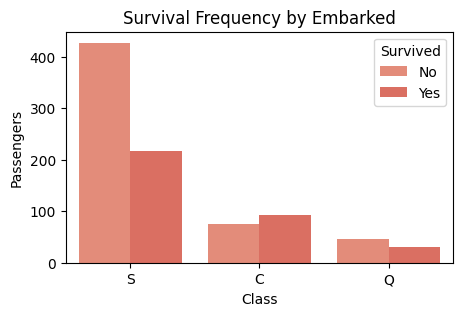

In [ ]:
# Gr√°fico de sobreviv√™ncia por classe social
plt.figure(figsize=(5, 3))
sns.countplot(x='Embarked', hue='Survived', data=train_set)
plt.title('Survival Frequency by Embarked')

plt.xlabel('Class')
plt.ylabel('Passengers')
plt.legend(title='Survived', labels=['No','Yes'])

plt.show()


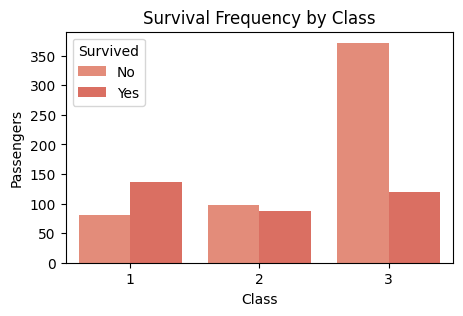

In [ ]:
# Gr√°fico de sobreviv√™ncia por classe social
plt.figure(figsize=(5, 3))
sns.countplot(x='Pclass', hue='Survived', data=train_set)
plt.title('Survival Frequency by Class')

plt.xlabel('Class')
plt.ylabel('Passengers')
plt.legend(title='Survived', labels=['No','Yes'])

plt.show()

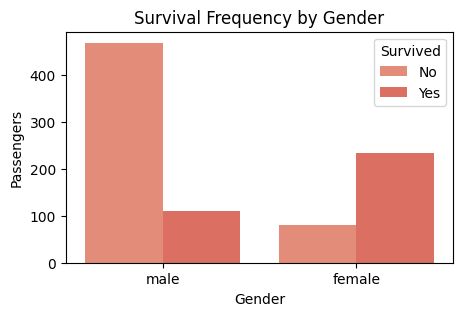

In [ ]:
# Gr√°fico de sobreviv√™ncia por sexo
plt.figure(figsize=(5, 3))
sns.countplot(x='Sex', hue='Survived', data=train_set)
plt.title('Survival Frequency by Gender')

plt.xlabel('Gender')
plt.ylabel('Passengers')
plt.legend(title='Survived', labels=['No','Yes'])

plt.show()

### Dados faltantes
#### A coluna Age apresenta 177 valores faltantes, indicando que uma quantidade significativa de passageiros n√£o teve sua idade registrada. A coluna Cabin √© a que apresenta o maior n√∫mero de dados ausentes, com 687 valores faltantes, sugerindo que muitas cabines n√£o foram registradas ou os passageiros n√£o tinham uma cabine espec√≠fica. A coluna Embarked possui apenas 2 valores faltantes, mostrando que a maioria dos passageiros tem o porto de embarque registrado.

In [ ]:
missing = train_set.isnull().sum()
print(missing)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


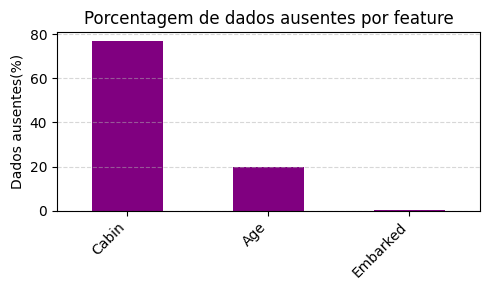

In [ ]:
missing = train_set.isnull().mean() * 100
missing = missing[missing > 0].sort_values(ascending=False)

# Plot
plt.figure(figsize=(5, 3))
missing.plot(kind='bar', color='purple')
plt.ylabel('Dados ausentes(%)')
plt.title('Porcentagem de dados ausentes por feature')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Outliers

 Tratando Outliers

Outliers s√£o pontos muito fora da curva (ex: o sal√°rio de um diretor vs. o de um estagi√°rio).

 Por que se importar?

* Eles bagun√ßam a **m√©dia**.
* Eles confundem alguns modelos (como Redes Neurais), fazendo-os errar mais.


> Cuidar dos outliers cria um modelo mais confi√°vel.

In [ ]:
def contar_outliers_iqr(df):
    """Calcula a quantidade de outliers para cada coluna num√©rica de um DataFrame."""
    outliers_dict = {}
    # Itera apenas sobre as colunas num√©ricas
    for col in df.select_dtypes(include=np.number).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
        outliers_dict[col] = outlier_count

    return outliers_dict



In [ ]:
outliers = contar_outliers_iqr(train_set)

for key, value in outliers.items():
  print(f'{key}: {value}')

PassengerId: 0
Survived: 0
Pclass: 0
Age: 11
SibSp: 46
Parch: 213
Fare: 116


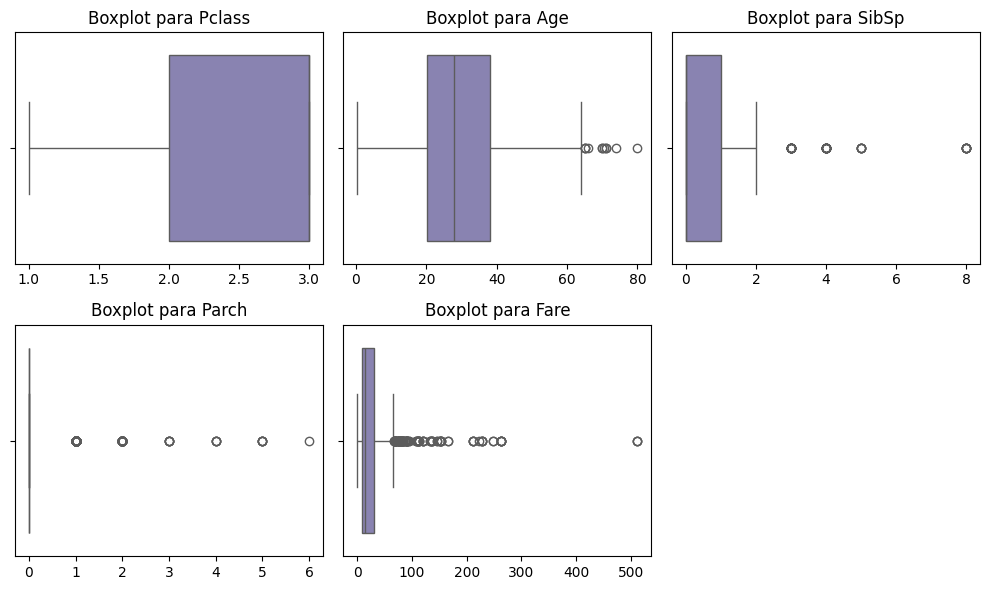

In [ ]:
# Lista de colunas que voc√™ deseja plotar ('Survived' foi removida)
cols_to_plot = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Cria a figura e a grade de subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
flat_axes = axes.flatten()

# pega a cor da biblioteca
purple_color = sns.color_palette("Purples_d")[2]

# Itera sobre os eixos e colunas para criar os gr√°ficos
for i, col in enumerate(cols_to_plot):
    ax = flat_axes[i]
    sns.boxplot(x=train_set[col], ax=ax, color=purple_color, whis=1.5)
    ax.set_title(f'Boxplot para {col}')
    ax.set_xlabel('')

# Esconde os eixos que n√£o foram utilizados
for i in range(len(cols_to_plot), len(flat_axes)):
    flat_axes[i].set_visible(False)

# Ajusta o layout para que os t√≠tulos e gr√°ficos n√£o se sobreponham
plt.tight_layout()
plt.show()

## **Parte 2 - Pr√©-processamento de Dados**

Removendo campos nome, id, n√∫mero da cabine e ticket. Esses dados n√£o ser√£o utilizados no treinamento.
Como grande parte dos valores da cabine n√£o est√£o presentes, n√£o faz sentido completar esses dados.

In [ ]:
dataset = train_set.drop(['PassengerId', 'Name', 'Cabin','Ticket'], axis=1)
dataset.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

Codifica√ß√£o do g√™nero usando o Label Encoder dado que √© bin√°rio

In [ ]:
le = LabelEncoder()
dataset['Sex'] = le.fit_transform(dataset['Sex'].astype(str))

### Dados Ausentes

√â necess√°rio completar os valores ausentes da idade, dado que √© uma feature relevante para ser exclu√≠da do treinamento. A coluna idade apresenta 20% de valores ausentes. Tamb√©m √© preciso *completar* o local de embarque com a moda dos valores. Visto que √© uma dado categ√≥rico.

In [ ]:
# Imputa√ß√£o na coluna 'Age' utilizando KNNImputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
dataset['Age'] = imputer.fit_transform(dataset[['Age']])

In [ ]:
# Imputa√ß√£o para a coluna 'Embarked' atrav√©s de um treinamento, como √© uma categoria n√£o √© poss√≠vel usar KNNImputer
dataset_imp = dataset.copy()
dataset_imp.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    1  22.0      1      0   7.2500        S
1         1       1    0  38.0      1      0  71.2833        C
2         1       3    0  26.0      0      0   7.9250        S
3         1       1    0  35.0      1      0  53.1000        S
4         0       3    1  35.0      0      0   8.0500        S

In [ ]:
# Treinando com base nas outras features
train_imp = dataset_imp.dropna()
test_imp = dataset_imp[dataset_imp.isna().any(axis=1)]

In [ ]:
# Separar X e y
X_train_imp = train_imp.drop('Embarked', axis = 1)
y_train_imp = train_imp['Embarked']
X_test_imp = test_imp.drop('Embarked', axis = 1)

In [ ]:
# Encoding no y_train
le = LabelEncoder()
y_train_imp = le.fit_transform(y_train_imp)

In [ ]:
# aplicar feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_imp = sc.fit_transform(X_train_imp)
X_test_imp = sc.transform(X_test_imp)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_imp, y_train_imp)

KNeighborsClassifier()

In [ ]:
y_pred_imp = classifier.predict(X_test_imp)

In [ ]:
y_test_original = le.inverse_transform(y_pred_imp)
print(y_test_original)

['S' 'C']


In [ ]:
test_imp.loc[test_imp.index, 'Embarked'] = y_test_original
test_imp

Survived  Pclass  Sex   Age  SibSp  Parch  Fare Embarked
61          1       1    0  38.0      0      0  80.0        S
829         1       1    0  62.0      0      0  80.0        C

In [ ]:
# desfazendo feature scaling
X_train_imp = sc.inverse_transform(X_train_imp)
X_test_imp = sc.inverse_transform(X_test_imp)
dataset_completed = pd.concat([train_imp, test_imp], axis = 0)

In [ ]:
# Atualizando dataset original
dataset = dataset_completed.copy()

### Tratamento de Outliers

In [ ]:
def tratar_features_numericas(df):
    """Aplica os tratamentos de outliers e transforma√ß√µes em um DataFrame."""
    df_tratado = df.copy()

    if 'Fare' in df_tratado.columns:
        df_tratado['Fare'] = np.log1p(df_tratado['Fare'])

    return df_tratado

In [ ]:
dataset = tratar_features_numericas(dataset)


In [ ]:
y = dataset.iloc[:, 0].values
X = dataset.iloc[:, 1:].values

###Codifica√ß√£o de Atributos



Codifica√ß√£o usando OneHotEncoder para o porto de embarque

In [ ]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Divis√£o dos dados




In [ ]:
X_not_survived = []
y_not_survived = []
X_survived = []
y_survived = []
for i in range(len(X)):
  if y[i] == 0:
    X_not_survived.append(X[i, :])
    y_not_survived.append(y[i])
  else:
    X_survived.append(X[i, :])
    y_survived.append(y[i])

X_not_survived = np.array(X_not_survived)
y_not_survived = np.array(y_not_survived)
X_survived = np.array(X_survived)
y_survived = np.array(y_survived)

### Dividindo os dados por classe

In [ ]:
print(len(X_not_survived))
print(len(y_not_survived))
print(len(X_survived))
print(len(y_survived))

549
549
342
342


In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X_not_survived,y_not_survived,
    train_size=0.75,
    random_state=1)

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_survived,y_survived,
    train_size=0.75,
    random_state=1)

In [ ]:
print(len(X_train_1))
print(len(X_train_2))

print(len(X_test_1))
print(len(X_test_2))

411
256
138
86


In [ ]:
X_train = np.concatenate((X_train_1, X_train_2), axis=0)
y_train = np.concatenate((y_train_1, y_train_2), axis=0)

X_test = np.concatenate((X_test_1, X_test_2), axis=0)
y_test = np.concatenate((y_test_1, y_test_2), axis=0)

In [ ]:
print(len(X_train))
print(len(X_test))

667
224


### Igualando tamanho das classes

In [ ]:
# √â necess√°rio garantir o equil√≠brio das classes para o conjunto de treino e de valida√ß√£o
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [ ]:
print(len(X_train))
print(len(X_test))

822
224


### Verificando se as classes est√£o devidamente equilibradas

In [ ]:
import pandas as pd
from collections import Counter
import numpy as np  # Garante que np.ndarray seja reconhecido, se necess√°rio

print("--- Contagem de Classes Ap√≥s Superamostragem ---")

# Para o conjunto de TREINO:
print("\nConjunto de Treino (y_train):")
if isinstance(y_train, (pd.Series, pd.DataFrame)):
    print(y_train.value_counts())
elif isinstance(y_train, np.ndarray):
    print(Counter(y_train))
else:
    print("Tipo de y_train n√£o reconhecido para value_counts ou Counter.")

print("\n--- Fim da Verifica√ß√£o ---")

--- Contagem de Classes Ap√≥s Superamostragem ---

Conjunto de Treino (y_train):
Counter({np.int64(0): 411, np.int64(1): 411})

--- Fim da Verifica√ß√£o ---


### Normaliza√ß√£o dos dados

In [ ]:
# Normaliza√ß√£o dos dados
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#X_val = scaler.transform(X_val)

## **Parte 3 - Treinamento utilizando √Årvore de decis√£o**

### An√°lise Experimental

Para treinar o classificador utilizando o m√©todo √Årvore de Decis√£o da biblioteca sklearn.tree, seguimos um processo estruturado que envolve as seguintes etapas principais:

- üîπ Separa√ß√£o dos conjuntos de dados
- üîπ Treinamento e teste do modelo
- üîπ Valida√ß√£o final com o conjunto de teste original

### Separa√ß√£o dos Conjuntos

Inicialmente, realizamos a divis√£o do conjunto de treino (train_set) em:

- X_train e y_train ‚Äî para o treinamento do modelo  
- X_test e y_test ‚Äî para teste intermedi√°rio e avalia√ß√£o de desempenho

O conjunto de teste original (test_set) √© reservado para a **valida√ß√£o final**, permitindo avaliar a capacidade de generaliza√ß√£o do modelo em dados nunca vistos.

### Treinamento / Teste de Modelos

Para realizar uma an√°lise abrangente dos dados, treinamos o classificador utilizando diferentes arquiteturas e par√¢metros do DecisionTreeClassifier.

As principais vari√°veis ajustadas foram:


---

## Estrat√©gia de Treinamento

A fim de entender melhor o comportamento dos modelos, podemos modificar um par√¢metro por vez, na seguinte ordem:

  


---




### Avalia√ß√£o de Desempenho

Para selecionar a m√©trica mais apropriada para avalia√ß√£o da rede neural, consideramos:

### Acur√°cia
Propor√ß√£o de previs√µes corretas em rela√ß√£o ao total de inst√¢ncias:

$$
\text{Acur√°cia} = \frac{TP + TN}{TP + TN + FP + FN} \tag{1}
$$

### Precis√£o
Capacidade de prever corretamente os positivos (evita falsos positivos):

$$
\text{Precis√£o} = \frac{TP}{TP + FP} \tag{2}
$$

### Recall
Capacidade de identificar todos os positivos reais (evita falsos negativos):

$$
\text{Recall} = \frac{TP}{TP + FN} \tag{3}
$$

### F1-Score
M√©dia harm√¥nica entre precis√£o e recall:

$$
F1 = 2 \cdot \frac{\text{Precis√£o} \cdot \text{Recall}}{\text{Precis√£o} + \text{Recall}} \tag{4}
$$

---

> Embora a acur√°cia forne√ßa uma vis√£o geral do desempenho, ela pode ser **enganosa em conjuntos de dados desbalanceados**. Por isso, as m√©tricas de **precis√£o, recall e F1-score** s√£o especialmente importantes para avaliar a qualidade real das previs√µes.
Do conjunto de treino, temos:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[113  25]
 [ 22  64]]


0.7901785714285714

In [ ]:
# k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print(accuracies)

[0.85542169 0.81927711 0.7804878  0.7804878  0.80487805 0.7804878
 0.8902439  0.93902439 0.8902439  0.8902439 ]


## √Årvore de Decis√£o



**Par√¢metros do classificador**

1. **Criterion:** A fun√ß√£o para medir a qualidade de uma divis√£o.
2. **Splitter:** O crit√©rio usado para escolher a divis√£o em cada n√≥.
3. **Max. Depth:** A profundidade m√°xima da √°rvore.
4. **Min. Samples Split:** O n√∫mero m√≠nimo de amostras necess√°rio para dividir um n√≥ interno.
5. **Min. Samples Leaf:** O n√∫mero m√≠nimo de amostras necess√°rio para estar em um n√≥ folha. Um ponto de divis√£o em qualquer profundidade s√≥ ser√° considerado se deixar pelo menos $n$ amostras de treinamento em cada um dos ramos esquerdo e direito.
6. **Min. Weight Fraction Leaf:** A fra√ß√£o m√≠nima da soma ponderada dos pesos (de todas as amostras de entrada) necess√°ria para estar em um n√≥ folha.
7. **Max. Features:** O n√∫mero de caracter√≠sticas a considerar ao procurar a melhor divis√£o.
8. **Max. Leaf Nodes:** Cria uma √°rvore com, no m√°ximo, $n$ folhas de forma a escolher os melhores n√≥s primeiro. Os melhores n√≥s s√£o definidos pela redu√ß√£o relativa na impureza.
9. **Min. Impurity Decrease:** Um n√≥ s√≥ ser√° dividido se essa divis√£o induzir uma redu√ß√£o na impureza maior ou igual a $n$. A equa√ß√£o da redu√ß√£o ponderada da impureza √©:
$$\frac{N_t}{N} ‚ãÖ (impurity - \frac{N_{tR}}{N_t} * rightImpurity - \frac{N_{tL}}{N_t} * leftImpurity)$$
onde $N$ √© o n√∫mero total de amostras, $N_t$ √© o n√∫mero de amostras no n√≥ atual, $N_{tL}$ √© o n√∫mero de amostras no filho esquerdo e $N_{tR}$ √© o n√∫mero de amostras no filho direito.
10. **Class Weight:** Pesos associados com as classes.
11. **CCP Alfa:** Par√¢metro de complexidade usado para o Minimal Cost-Complexity Pruning. A sub√°rvore com a maior complexidade de custo que for menor que $n$ ser√° escolhida.
12. **Monotonic Constraint:** Restri√ß√µes sobre a monotonicidade das caracter√≠sticas. Se um valor for -1 ou 1, a √°rvore for√ßar√° a restri√ß√£o de que a previs√£o seja mon√≥tona em rela√ß√£o √† caracter√≠stica; caso contr√°rio, se for 0, a previs√£o n√£o ter√° restri√ß√£o.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Bibliotecas de modelagem carregadas com sucesso!")

Bibliotecas de modelagem carregadas com sucesso!


Treinamento do Modelo de √Årvore de Decis√£o (Baseline)


--- Relat√≥rio de Classifica√ß√£o (Modelo Base) ---
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       138
           1       0.72      0.74      0.73        86

    accuracy                           0.79       224
   macro avg       0.78      0.78      0.78       224
weighted avg       0.79      0.79      0.79       224


--- Matriz de Confus√£o (Modelo Base) ---


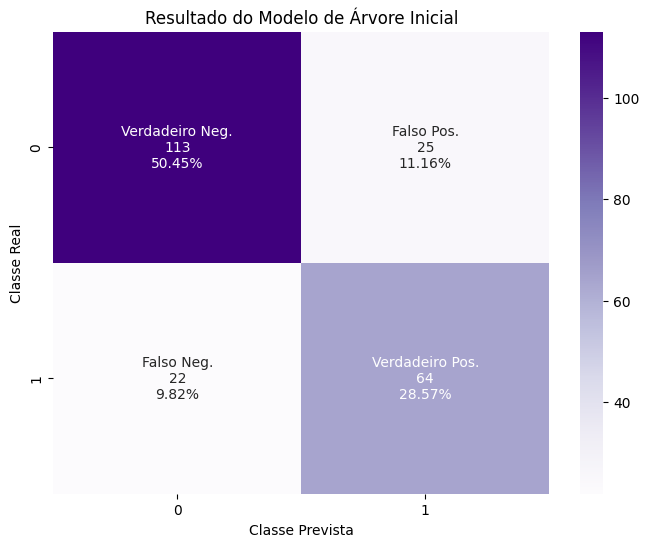

In [ ]:
# 1. Instanciar o classificador
# Usamos random_state para garantir que os resultados sejam reproduz√≠veis
modelo_arvore_base = DecisionTreeClassifier(random_state=42)

# 2. Treinar o modelo com os dados de treino
modelo_arvore_base.fit(X_train, y_train)

# 3. Fazer previs√µes no conjunto de teste
previsoes_base = modelo_arvore_base.predict(X_test)

# 4. Avaliar o desempenho do modelo
print("\n--- Relat√≥rio de Classifica√ß√£o (Modelo Base) ---")
print(classification_report(y_test, previsoes_base))

# 5. Visualizar a Matriz de Confus√£o
print("\n--- Matriz de Confus√£o (Modelo Base) ---")
matriz_confusao_base = confusion_matrix(y_test, previsoes_base)

# Prepara√ß√£o dos R√≥tulos com Contagens e Porcentagens
nomes_grupos = ['Verdadeiro Neg.', 'Falso Pos.', 'Falso Neg.', 'Verdadeiro Pos.']
contagens_grupos = ["{0:0.0f}".format(value) for value in matriz_confusao_base.flatten()]
total_predicoes = np.sum(matriz_confusao_base)
porcentagens_grupos = ["{0:.2%}".format(value/total_predicoes) for value in matriz_confusao_base.flatten()]
labels_matriz = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(nomes_grupos, contagens_grupos, porcentagens_grupos)]
labels_matriz = np.asarray(labels_matriz).reshape(2, 2)


# Plotagem da Matriz
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_base, annot=labels_matriz, fmt='', cmap='Purples')
plt.title('Resultado do Modelo de √Årvore Inicial')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()

Estrutura da √Årvore

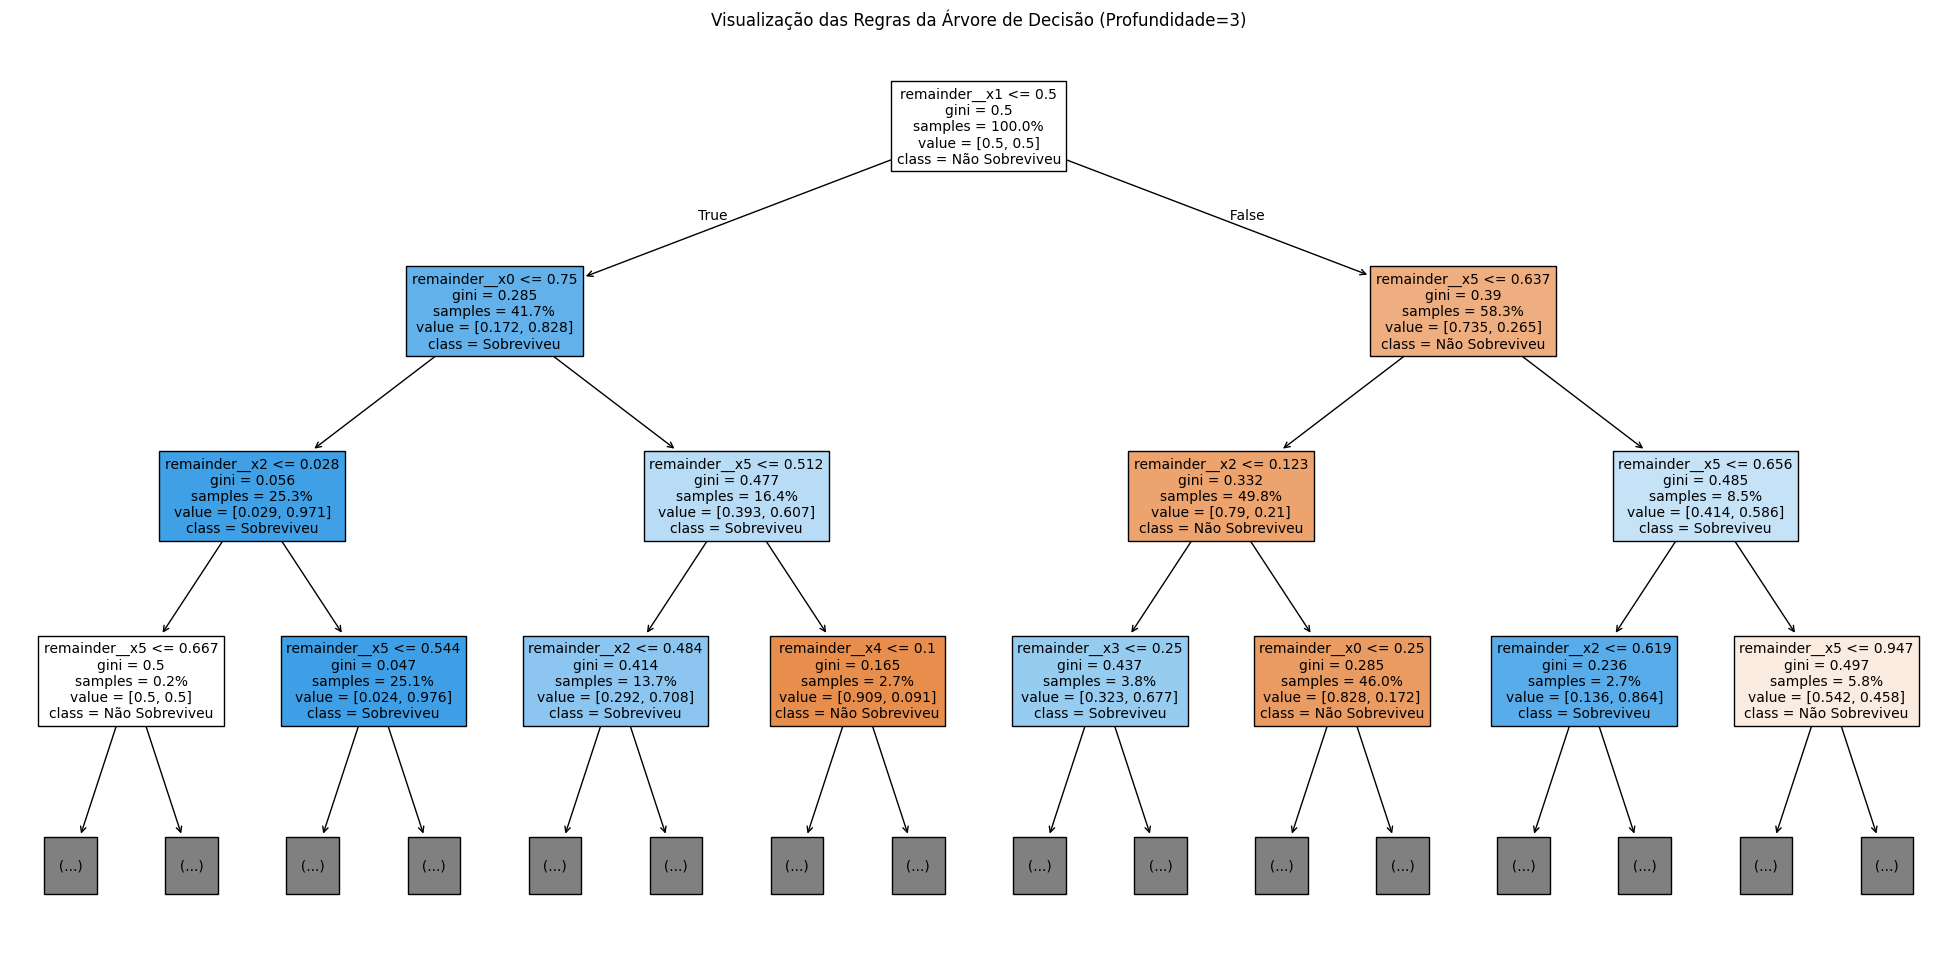

In [ ]:
# Recuperando os nomes das features do ColumnTransformer (ct)
try:
    nomes_features = ct.get_feature_names_out()
except AttributeError:
    # Fallback para vers√µes mais antigas do scikit-learn
    cat_features = ct.transformers_[0][1].get_feature_names(['Embarked'])
    num_features = [col for col in dataset.columns if col not in ['Survived', 'Embarked']]
    nomes_features = list(cat_features) + list(num_features)


nomes_classes = ['N√£o Sobreviveu', 'Sobreviveu']

plt.figure(figsize=(25, 12))
plot_tree(modelo_arvore_base,
          feature_names=nomes_features,
          class_names=nomes_classes,
          filled=True,
          max_depth=3,  # Limitar a profundidade para uma visualiza√ß√£o clara
          fontsize=10,
          proportion=True) # Mostra a propor√ß√£o das amostras em cada n√≥

plt.title("Visualiza√ß√£o das Regras da √Årvore de Decis√£o (Profundidade=3)")
plt.show()

### Buscando melhores hiperpar√¢mtros

#### GridSearch

In [ ]:
# Definindo a grade de par√¢metros a serem testados
parametros_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 7, 9, 11],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4]
}

# Configurando o GridSearchCV
# cv=5 significa 5-fold cross-validation
grid_cv = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                       param_grid=parametros_grid,
                       cv=5,
                       n_jobs=-1, # Utiliza todos os n√∫cleos de CPU dispon√≠veis
                       verbose=1)

# Executando a busca
grid_cv.fit(X_train, y_train)

print("Melhores par√¢metros encontrados: ", grid_cv.best_params_)
print("Melhor score de valida√ß√£o cruzada (acur√°cia): {:.2f}%".format(grid_cv.best_score_ * 100))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Melhores par√¢metros encontrados:  {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor score de valida√ß√£o cruzada (acur√°cia): 83.83%


Avalia√ß√£o do Modelo Otimizado


--- Relat√≥rio de Classifica√ß√£o (Modelo Otimizado) ---
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       138
           1       0.73      0.72      0.73        86

    accuracy                           0.79       224
   macro avg       0.78      0.78      0.78       224
weighted avg       0.79      0.79      0.79       224


--- Matriz de Confus√£o (Modelo Otimizado) ---


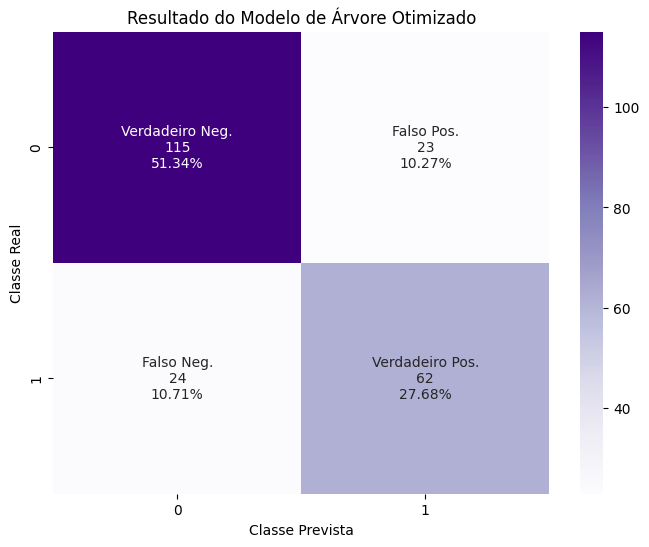

In [ ]:
# O melhor modelo j√° vem treinado ap√≥s o .fit() do GridSearchCV
modelo_otimizado = grid_cv.best_estimator_

# Fazer previs√µes com o modelo otimizado
previsoes_otimizadas = modelo_otimizado.predict(X_test)

# Avaliar o desempenho
print("\n--- Relat√≥rio de Classifica√ß√£o (Modelo Otimizado) ---")
print(classification_report(y_test, previsoes_otimizadas))

# Visualizar a Matriz de Confus√£o
print("\n--- Matriz de Confus√£o (Modelo Otimizado) ---")
matriz_confusao_otimizada = confusion_matrix(y_test, previsoes_otimizadas)

# Prepara√ß√£o dos R√≥tulos com Contagens e Porcentagens
nomes_grupos = ['Verdadeiro Neg.', 'Falso Pos.', 'Falso Neg.', 'Verdadeiro Pos.']
contagens_grupos_otimizada = ["{0:0.0f}".format(value) for value in matriz_confusao_otimizada.flatten()]
total_predicoes_otimizado = np.sum(matriz_confusao_otimizada)
porcentagens_grupos_otimizada = ["{0:.2%}".format(value/total_predicoes_otimizado) for value in matriz_confusao_otimizada.flatten()]
labels_matriz_otimizada = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(nomes_grupos, contagens_grupos_otimizada, porcentagens_grupos_otimizada)]
labels_matriz_otimizada = np.asarray(labels_matriz_otimizada).reshape(2, 2)

# Plotagem da Matriz
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_otimizada, annot=labels_matriz_otimizada, fmt='', cmap='Purples')
plt.title('Resultado do Modelo de √Årvore Otimizado')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()

####  Optuna

[I 2025-07-25 14:26:01,634] A new study created in memory with name: no-name-d705c241-c0e3-43e0-bca6-edbbd232a4cd
[I 2025-07-25 14:26:01,651] Trial 0 finished with value: 0.7901785714285714 and parameters: {'criterion': 'entropy', 'max_depth': 31, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.7901785714285714.
[I 2025-07-25 14:26:01,673] Trial 1 finished with value: 0.8080357142857143 and parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.8080357142857143.
[I 2025-07-25 14:26:01,682] Trial 2 finished with value: 0.7544642857142857 and parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 14}. Best is trial 1 with value: 0.8080357142857143.
[I 2025-07-25 14:26:01,692] Trial 3 finished with value: 0.8080357142857143 and parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 13}. Best is trial

--- Iniciando otimiza√ß√£o com Optuna ---


[I 2025-07-25 14:26:01,883] Trial 11 finished with value: 0.8214285714285714 and parameters: {'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 16, 'min_samples_leaf': 20}. Best is trial 6 with value: 0.8348214285714286.
[I 2025-07-25 14:26:01,920] Trial 12 finished with value: 0.8214285714285714 and parameters: {'criterion': 'gini', 'max_depth': 16, 'min_samples_split': 20, 'min_samples_leaf': 17}. Best is trial 6 with value: 0.8348214285714286.
[I 2025-07-25 14:26:01,959] Trial 13 finished with value: 0.8214285714285714 and parameters: {'criterion': 'gini', 'max_depth': 17, 'min_samples_split': 14, 'min_samples_leaf': 16}. Best is trial 6 with value: 0.8348214285714286.
[I 2025-07-25 14:26:01,999] Trial 14 finished with value: 0.8214285714285714 and parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 14, 'min_samples_leaf': 20}. Best is trial 6 with value: 0.8348214285714286.
[I 2025-07-25 14:26:02,049] Trial 15 finished with value: 0.8125 and parameter


--- Treinando o modelo final com os melhores hiperpar√¢metros ---

--- Relat√≥rio de Classifica√ß√£o (Modelo Otimizado com Optuna) ---
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       138
           1       0.80      0.78      0.79        86

    accuracy                           0.84       224
   macro avg       0.83      0.83      0.83       224
weighted avg       0.84      0.84      0.84       224


--- Matriz de Confus√£o (Modelo Otimizado com Optuna) ---


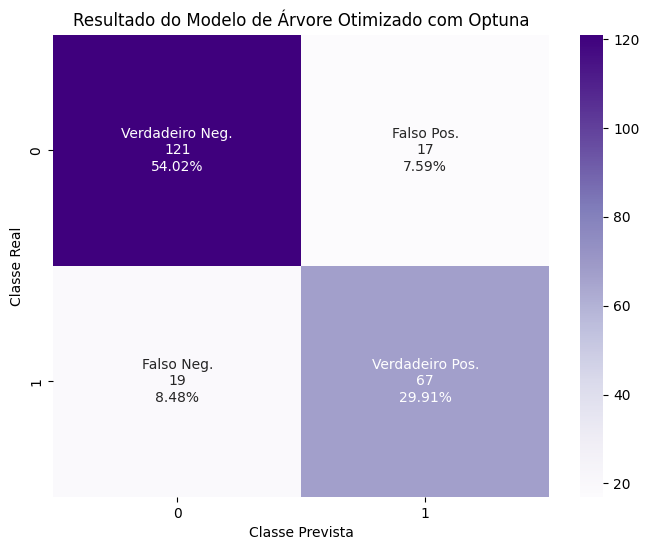


Melhores hiperpar√¢metros encontrados pelo Optuna:
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 15, 'min_samples_leaf': 2}


In [ ]:
# 1. Definir a fun√ß√£o "objetivo" que o Optuna ir√° otimizar
def objetivo(trial):
    # Definir o espa√ßo de busca dos hiperpar√¢metros
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    # Criar o modelo com os hiperpar√¢metros sugeridos
    modelo_arvore = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Treinar e avaliar o modelo para obter a pontua√ß√£o (acur√°cia, neste caso)
    modelo_arvore.fit(X_train, y_train)
    acuracia = modelo_arvore.score(X_test, y_test)

    # Retornar a pontua√ß√£o que o Optuna deve maximizar
    return acuracia

# 2. Criar e executar o estudo do Optuna
print("--- Iniciando otimiza√ß√£o com Optuna ---")
estudo = optuna.create_study(direction='maximize')
estudo.optimize(objetivo, n_trials=100) # n_trials √© o n√∫mero de combina√ß√µes a testar

# 3. Criar o modelo final com os melhores par√¢metros e trein√°-lo
print("\n--- Treinando o modelo final com os melhores hiperpar√¢metros ---")
melhores_parametros = estudo.best_params
modelo_otimizado = DecisionTreeClassifier(**melhores_parametros, random_state=42)
modelo_otimizado.fit(X_train, y_train)

# --- FIM: OTIMIZA√á√ÉO COM OPTUNA ---


# --- IN√çCIO: C√ìDIGO DE AVALIA√á√ÉO E PLOTAGEM ---

# Fazer previs√µes com o modelo otimizado
previsoes_otimizadas = modelo_otimizado.predict(X_test)

# Avaliar o desempenho
print("\n--- Relat√≥rio de Classifica√ß√£o (Modelo Otimizado com Optuna) ---")
print(classification_report(y_test, previsoes_otimizadas))

# Visualizar a Matriz de Confus√£o
print("\n--- Matriz de Confus√£o (Modelo Otimizado com Optuna) ---")
matriz_confusao_otimizada = confusion_matrix(y_test, previsoes_otimizadas)

# Prepara√ß√£o dos R√≥tulos com Contagens e Porcentagens
nomes_grupos = ['Verdadeiro Neg.', 'Falso Pos.', 'Falso Neg.', 'Verdadeiro Pos.']
contagens_grupos_otimizada = ["{0:0.0f}".format(value) for value in matriz_confusao_otimizada.flatten()]
total_predicoes_otimizado = np.sum(matriz_confusao_otimizada)
porcentagens_grupos_otimizada = ["{0:.2%}".format(value/total_predicoes_otimizado) for value in matriz_confusao_otimizada.flatten()]
labels_matriz_otimizada = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(nomes_grupos, contagens_grupos_otimizada, porcentagens_grupos_otimizada)]
labels_matriz_otimizada = np.asarray(labels_matriz_otimizada).reshape(2, 2)

# Plotagem da Matriz
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_otimizada, annot=labels_matriz_otimizada, fmt='', cmap='Purples')
plt.title('Resultado do Modelo de √Årvore Otimizado com Optuna')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()

# Opcional: mostrar os melhores par√¢metros encontrados
print("\nMelhores hiperpar√¢metros encontrados pelo Optuna:")
print(estudo.best_params)


## Random forest

Treinamento e Avalia√ß√£o do Random Forest

--- Comparando com o Modelo Random Forest ---

Treinando o modelo Random Forest...
Treinamento conclu√≠do.

--- Relat√≥rio de Classifica√ß√£o (Random Forest) ---
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       138
           1       0.70      0.73      0.72        86

    accuracy                           0.78       224
   macro avg       0.76      0.77      0.77       224
weighted avg       0.78      0.78      0.78       224


--- Matriz de Confus√£o (Random Forest) ---


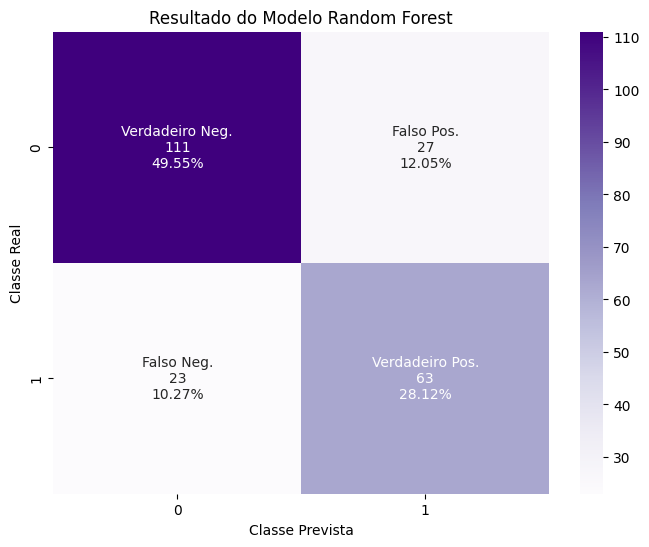

In [ ]:
# --- C√≥digo para o Modelo Random Forest ---

print("--- Comparando com o Modelo Random Forest ---")

# 1. Instanciar e treinar o modelo
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
print("\nTreinando o modelo Random Forest...")
modelo_rf.fit(X_train, y_train)
print("Treinamento conclu√≠do.")

# 2. Fazer previs√µes
previsoes_rf = modelo_rf.predict(X_test)

# 3. Avaliar o desempenho
print("\n--- Relat√≥rio de Classifica√ß√£o (Random Forest) ---")
print(classification_report(y_test, previsoes_rf))

# 4. Visualizar a Matriz de Confus√£o com Porcentagens
print("\n--- Matriz de Confus√£o (Random Forest) ---")
matriz_confusao_rf = confusion_matrix(y_test, previsoes_rf)

# Prepara√ß√£o dos R√≥tulos com Contagens e Porcentagens
contagens_grupos_rf = ["{0:0.0f}".format(value) for value in matriz_confusao_rf.flatten()]
total_predicoes_rf = np.sum(matriz_confusao_rf)
porcentagens_grupos_rf = ["{0:.2%}".format(value/total_predicoes_rf) for value in matriz_confusao_rf.flatten()]
labels_matriz_rf = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(nomes_grupos, contagens_grupos_rf, porcentagens_grupos_rf)]
labels_matriz_rf = np.asarray(labels_matriz_rf).reshape(2, 2)

# Plotagem da Matriz
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_rf, annot=labels_matriz_rf, fmt='', cmap='Purples')
plt.title('Resultado do Modelo Random Forest')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()

### Buscando melhores Hiperpar√¢metros

#### GridSearch

In [ ]:
# --- 1. Definir o Modelo e a Grade de Hiperpar√¢metros ---
print("--- Iniciando a busca com GridSearchCV para o Random Forest ---")
modelo_rf_base = RandomForestClassifier(random_state=42)

# ATEN√á√ÉO: A grade abaixo √© um exemplo. Grades grandes podem levar MUITO tempo para executar.
# Ajuste os valores de acordo com seu poder computacional e tempo dispon√≠vel.
param_grid = {
    'n_estimators': [100, 200],              # N√∫mero de √°rvores na floresta
    'max_depth': [10, 20, None],             # Profundidade m√°xima da √°rvore
    'min_samples_split': [2, 5],             # N¬∫ m√≠nimo de amostras para dividir um n√≥
    'min_samples_leaf': [1, 2],              # N¬∫ m√≠nimo de amostras em um n√≥ folha
    'max_features': ['sqrt', 'log2']         # N¬∫ de features a considerar para a melhor divis√£o
}

# --- 2. Instanciar e Configurar o GridSearchCV ---
# cv=3 significa valida√ß√£o cruzada com 3 dobras. Aumente para 5 para mais robustez.
# n_jobs=-1 usa todos os n√∫cleos do processador para acelerar o processo.
# verbose=2 mostra o progresso da busca.
grid_search_rf = GridSearchCV(estimator=modelo_rf_base, param_grid=param_grid,
                              cv=3, n_jobs=-1, verbose=2)


# --- 3. Executar a Busca ---
print("\nExecutando a busca em grade... Isso pode levar alguns minutos.")
grid_search_rf.fit(X_train, y_train)
print("Busca em grade conclu√≠da.")

--- Iniciando a busca com GridSearchCV para o Random Forest ---

Executando a busca em grade... Isso pode levar alguns minutos.
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Busca em grade conclu√≠da.



Melhores hiperpar√¢metros encontrados:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

--- Relat√≥rio de Classifica√ß√£o (Random Forest Otimizado) ---
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       138
           1       0.73      0.73      0.73        86

    accuracy                           0.79       224
   macro avg       0.78      0.78      0.78       224
weighted avg       0.79      0.79      0.79       224


--- Matriz de Confus√£o (Random Forest Otimizado) ---


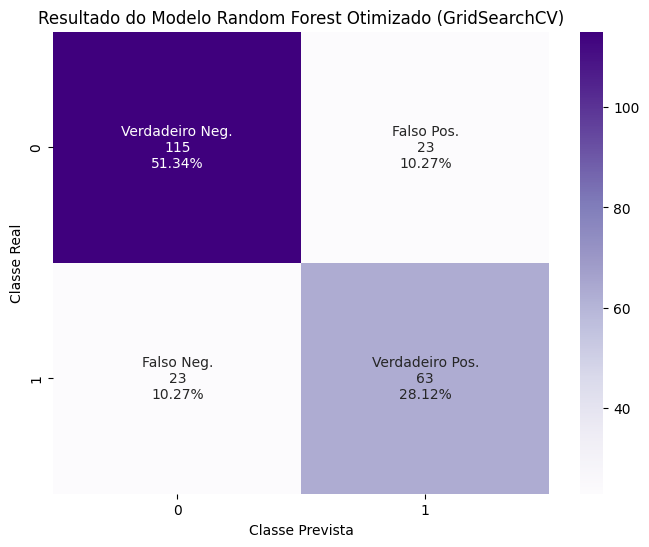

In [ ]:
# --- 4. Obter Resultados e Avaliar o Melhor Modelo ---
print("\nMelhores hiperpar√¢metros encontrados:")
print(grid_search_rf.best_params_)

# O melhor modelo j√° vem treinado com os dados de treino completos
modelo_rf_otimizado = grid_search_rf.best_estimator_

# Fazer previs√µes com o modelo otimizado
previsoes_rf_otimizadas = modelo_rf_otimizado.predict(X_test)

# Avaliar o desempenho
print("\n--- Relat√≥rio de Classifica√ß√£o (Random Forest Otimizado) ---")
print(classification_report(y_test, previsoes_rf_otimizadas))

# Visualizar a Matriz de Confus√£o com Porcentagens
print("\n--- Matriz de Confus√£o (Random Forest Otimizado) ---")
matriz_confusao_rf = confusion_matrix(y_test, previsoes_rf_otimizadas)

# Prepara√ß√£o dos R√≥tulos
nomes_grupos = ['Verdadeiro Neg.', 'Falso Pos.', 'Falso Neg.', 'Verdadeiro Pos.']
contagens_grupos_rf = ["{0:0.0f}".format(value) for value in matriz_confusao_rf.flatten()]
total_predicoes_rf = np.sum(matriz_confusao_rf)
porcentagens_grupos_rf = ["{0:.2%}".format(value/total_predicoes_rf) for value in matriz_confusao_rf.flatten()]
labels_matriz_rf = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(nomes_grupos, contagens_grupos_rf, porcentagens_grupos_rf)]
labels_matriz_rf = np.asarray(labels_matriz_rf).reshape(2, 2)

# Plotagem da Matriz
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_rf, annot=labels_matriz_rf, fmt='', cmap='Purples')
plt.title('Resultado do Modelo Random Forest Otimizado (GridSearchCV)')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()

#### Optuna

In [ ]:
# --- 1. Definir a Fun√ß√£o "Objetivo" para o Optuna ---
def objetivo_rf(trial):
    # Definir o espa√ßo de busca dos hiperpar√¢metros para o Random Forest
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, log=True)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])

    # Criar o modelo com os hiperpar√¢metros sugeridos
    modelo = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )

    # Treinar e avaliar o modelo para obter a pontua√ß√£o
    modelo.fit(X_train, y_train)
    acuracia = modelo.score(X_test, y_test)

    # Retornar a pontua√ß√£o que o Optuna deve maximizar
    return acuracia

# --- 2. Criar e Executar o Estudo do Optuna ---
print("--- Iniciando otimiza√ß√£o com Optuna para o Random Forest ---")
# 'sampler' √© o algoritmo de busca. TPE √© o padr√£o e geralmente o melhor.
sampler = optuna.samplers.TPESampler(seed=42)
estudo_rf = optuna.create_study(direction='maximize', sampler=sampler)

# Iniciar a busca. 'n_trials' √© o n√∫mero de combina√ß√µes a serem testadas.
estudo_rf.optimize(objetivo_rf, n_trials=50) # 50 tentativas para encontrar os melhores par√¢metros
print("Otimiza√ß√£o conclu√≠da.")


# --- 3. Obter o Melhor Modelo e Trein√°-lo ---
print("\nMelhores hiperpar√¢metros encontrados:")
print(estudo_rf.best_params)

# Criar e treinar o modelo final com os melhores par√¢metros encontrados pelo Optuna
modelo_rf_otimizado = RandomForestClassifier(**estudo_rf.best_params, random_state=42, n_jobs=-1)
modelo_rf_otimizado.fit(X_train, y_train)


# --- 4. Avaliar o Melhor Modelo e Plotar a Matriz de Confus√£o ---
# Fazer previs√µes
previsoes_rf_otimizadas = modelo_rf_otimizado.predict(X_test)

# Avaliar o desempenho
print("\n--- Relat√≥rio de Classifica√ß√£o (Random Forest Otimizado com Optuna) ---")
print(classification_report(y_test, previsoes_rf_otimizadas))

# Visualizar a Matriz de Confus√£o com Porcentagens
print("\n--- Matriz de Confus√£o (Random Forest Otimizado com Optuna) ---")
matriz_confusao_rf = confusion_matrix(y_test, previsoes_rf_otimizadas)

# Prepara√ß√£o dos R√≥tulos
nomes_grupos = ['Verdadeiro Neg.', 'Falso Pos.', 'Falso Neg.', 'Verdadeiro Pos.']
contagens_grupos_rf = ["{0:0.0f}".format(value) for value in matriz_confusao_rf.flatten()]
total_predicoes_rf = np.sum(matriz_confusao_rf)
porcentagens_grupos_rf = ["{0:.2%}".format(value/total_predicoes_rf) for value in matriz_confusao_rf.flatten()]
labels_matriz_rf = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(nomes_grupos, contagens_grupos_rf, porcentagens_grupos_rf)]
labels_matriz_rf = np.asarray(labels_matriz_rf).reshape(2, 2)

[I 2025-07-25 14:26:56,017] A new study created in memory with name: no-name-533e07f7-dafd-41c5-bece-5d118b2dbd2d


--- Iniciando otimiza√ß√£o com Optuna para o Random Forest ---


[I 2025-07-25 14:26:56,699] Trial 0 finished with value: 0.8080357142857143 and parameters: {'n_estimators': 236, 'max_depth': 48, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8080357142857143.
[I 2025-07-25 14:26:57,059] Trial 1 finished with value: 0.7991071428571429 and parameters: {'n_estimators': 114, 'max_depth': 45, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.8080357142857143.
[I 2025-07-25 14:26:59,049] Trial 2 finished with value: 0.8169642857142857 and parameters: {'n_estimators': 680, 'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 2 with value: 0.8169642857142857.
[I 2025-07-25 14:26:59,786] Trial 3 finished with value: 0.8169642857142857 and parameters: {'n_estimators': 270, 'max_depth': 21, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 2 with value: 0.81696428571428

Otimiza√ß√£o conclu√≠da.

Melhores hiperpar√¢metros encontrados:
{'n_estimators': 435, 'max_depth': 39, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}

--- Relat√≥rio de Classifica√ß√£o (Random Forest Otimizado com Optuna) ---
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       138
           1       0.76      0.79      0.77        86

    accuracy                           0.82       224
   macro avg       0.81      0.82      0.81       224
weighted avg       0.82      0.82      0.82       224


--- Matriz de Confus√£o (Random Forest Otimizado com Optuna) ---


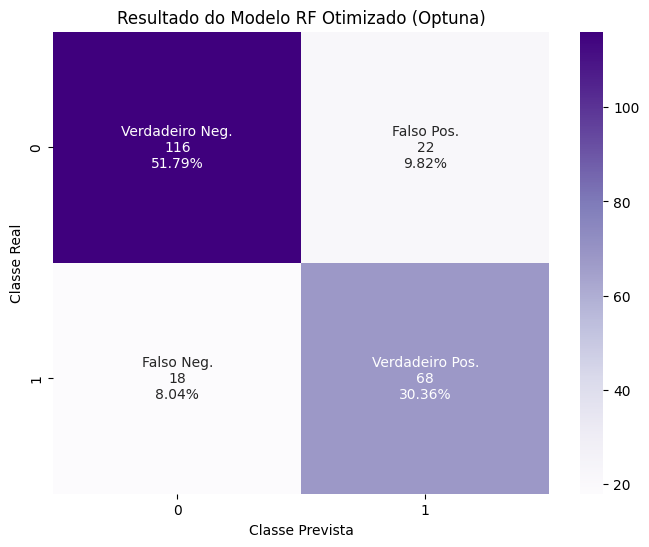

In [ ]:
# Plotagem da Matriz
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_rf, annot=labels_matriz_rf, fmt='', cmap='Purples')
plt.title('Resultado do Modelo RF Otimizado (Optuna)')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()